In [1]:
# Caer - is a set of utility functions designed to help speed up your Computer Vision workflow. Functions 
#inside caer will help reduce the number of calculation calls your code makes, ultimately making it neat, concise and readable.

# Canaro - A Computer Vision library in Python with powerful image processing operations, including support for 
#Deep Learning models built using the Keras framework.

# gc (garbage collector) - This module provides an interface to the optional garbage collector. 
# It provides the ability to disable the collector, tune the collection frequency, and set debugging options.

In [2]:
import os
import caer    
import canaro
import cv2 as cv
import gc
import matplotlib.pyplot as plt
import tensorflow 

In [3]:
img_size = (64,64)
channels = 1
# Path of the base folder containing all the characters images -->
char_path = r"C:\Users\divyam\Documents\ComputerVision\simpsons_dataset\simpsons_dataset"

In [4]:
# Creating dictionary to store the number of images in each folder -->
char_dict = {}
for char in os.listdir(char_path):
    char_dict[char] = len(os.listdir(os.path.join(char_path, char)))
# Sorting the dictionary in descending order -->
char_dict = caer.sort_dict(char_dict, descending = True)
print(char_dict)

[('abraham_grampa_simpson', 280), ('bart_simpson', 280), ('chief_wiggum', 220), ('charles_montgomery_burns', 215), ('apu_nahasapeemapetilon', 210)]


In [9]:
# Storing ist 10 character's names in a list -->
characters =[]
# count = 0
for i in char_dict:
    characters.append(i[0])   # getting the names(keys of the dict) only 
#     count+=1
#     if count>=10:
#         break
# print("-------------------")
print(characters)

['abraham_grampa_simpson', 'bart_simpson', 'chief_wiggum', 'charles_montgomery_burns', 'apu_nahasapeemapetilon']


In [6]:
#  Creating training dataset -->
train = caer.preprocess_from_dir(char_path, characters, channels=channels,IMG_SIZE=img_size, isShuffle=True)
print(len(train))

[INFO] Could not find a file to load from. Generating the training data
----------------------------------------------
[INFO] 280 files found in 0.004213571548461914s
[INFO] 280 files found in 0.0s
[INFO] 220 files found in 0.0s
[INFO] 215 files found in 0.0035386085510253906s
[INFO] 210 files found in 0.0s
----------------------------------------------
[INFO] 1205 files preprocessed! Took 0m 6s
1205


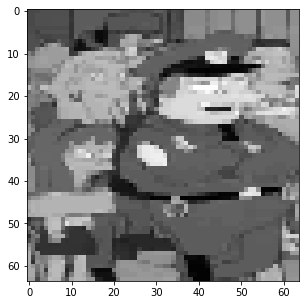

In [7]:
plt.figure(figsize=(5,5))
plt.imshow(train[0][0], cmap="gray")
plt.show()

In [10]:
# Separating the training dataset into features and labels
featureSet, labels = caer.sep_train(train, IMG_SIZE = img_size)

In [11]:
# Normalize the feature set-
from tensorflow.keras.utils import to_categorical

featureSet = caer.normalize(featureSet)
labels = to_categorical(labels, len(characters))

In [12]:
x_train,x_val,y_train,y_val = caer.train_val_split(featureSet, labels, val_ratio = 0.2)

In [13]:
import numpy as np
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
x_val = np.asarray(x_val)
y_val = np.asarray(y_val)

In [ ]:
del train
del featureSet
del labels
gc.collect()

In [14]:
BATCH_SIZE = 32
EPOCHS = 5

In [15]:
# Image Data Generator -
datagen = canaro.generators.imageDataGenerator()
train_gen = datagen.flow(x_train,y_train, batch_size = BATCH_SIZE)

# train_datagen = tensorflow.keras.preprocessing.image.ImageDataGenerator(rescale = 1./255,
#                                    shear_range = 0.2,
#                                    zoom_range = 0.2,
#                                    horizontal_flip = True)
# training_set = train_datagen.flow_from_directory(train,
#                                                  target_size = (64, 64),
#                                                  batch_size = 32)


In [23]:
model = canaro.models.createSimpsonsModel(IMG_SIZE = img_size, channels= channels, learning_rate= 0.001, 
                                          output_dim= len(characters), loss= "binary_crossentropy", momentum= 0.6,
                                          decay= 1e-6, nesterov= True)

C:\Users\divyam\Anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [24]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 64, 64, 32)        320       
                                                                 
 conv2d_19 (Conv2D)          (None, 62, 62, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 31, 31, 32)        0         
                                                                 
 conv2d_20 (Conv2D)          (None, 31, 31, 64)        18496     
                                                                 
 conv2d_21 (Conv2D)          (None, 29, 29, 64)        36928     
                                                      

In [25]:
from tensorflow.keras.callbacks import LearningRateScheduler
callbacks_list = [LearningRateScheduler(canaro.lr_schedule)]

In [29]:
training = model.fit(train_gen,steps_per_epoch=len(x_train)//BATCH_SIZE, epochs = 30, validation_data=(x_val,y_val), 
                     validation_steps=len(y_val)//BATCH_SIZE, callbacks=callbacks_list)

Epoch 1/30
30/30 [==============================] - 21s 699ms/step - loss: 0.4834 - accuracy: 0.2932 - val_loss: 0.4757 - val_accuracy: 0.3058 - lr: 0.0100
Epoch 2/30
30/30 [==============================] - 20s 692ms/step - loss: 0.4779 - accuracy: 0.3308 - val_loss: 0.4697 - val_accuracy: 0.3512 - lr: 0.0100
Epoch 3/30
30/30 [==============================] - 20s 678ms/step - loss: 0.4700 - accuracy: 0.3652 - val_loss: 0.4650 - val_accuracy: 0.2975 - lr: 0.0100
Epoch 4/30
30/30 [==============================] - 20s 678ms/step - loss: 0.4670 - accuracy: 0.3373 - val_loss: 0.4559 - val_accuracy: 0.4298 - lr: 0.0100
Epoch 5/30
30/30 [==============================] - 18s 599ms/step - loss: 0.4618 - accuracy: 0.3974 - val_loss: 0.4506 - val_accuracy: 0.3967 - lr: 0.0100
Epoch 6/30
30/30 [==============================] - 16s 547ms/step - loss: 0.4601 - accuracy: 0.3771 - val_loss: 0.4473 - val_accuracy: 0.4298 - lr: 0.0100
Epoch 7/30
30/30 [==============================] - 19s 651ms/st

In [59]:
def prepare(img):
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img = cv.resize(img, (64,64))
    img = caer.reshape(img,(64,64),1)
    return img

In [75]:
img = cv.imread("test_image2.jpeg")

In [76]:
predictions = model.predict(prepare(img))

1/1 [==============================] - 0s 38ms/step


In [79]:
print(characters[np.argmax(predictions)])

abraham_grampa_simpson
